In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("gurgaon_properties_cleaned_v1.csv")

In [3]:
data.duplicated().sum()

122

In [4]:
data.head(4)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,not available,2.0,NaN,0 to 1 Year Old,"['Sector 55-56 Metro Station', 'The Leaf Mall ...",NaN,"['Lift(s)', 'Park']"
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,"study room,servant room",4.0,NaN,Within 6 months,"['Sant Soordas Sihi Metro Station', 'Airia Mal...",NaN,"['Power Back-up', 'Intercom Facility', 'Lift(s..."
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,not available,0.0,NaN,Under Construction,"['V3S Sapphire Ninety Mall', 'Sector 86 Road',...",[],"['Intercom Facility', 'Lift(s)', 'Park']"
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,not available,17.0,NaN,0 to 1 Year Old,"['Huda City Centre', 'Omaxe City Centre', 'Nin...",[],"['Feng Shui / Vaastu Compliant', 'Security / F..."


In [5]:
data.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'additionalRoom',
       'floorNum', 'facing', 'agePossession', 'nearbyLocations',
       'furnishDetails', 'features'],
      dtype='object')

### we have to focus on the the features name as areaWithType, additionalRoom, agePossession, furnishDetails, features.

In [6]:
data.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
1523,0.95,1956.0,Super Built up area 1956(181.72 sq.m.)
990,6.25,1800.0,Plot area 200(167.23 sq.m.)
293,3.80,1458.0,Plot area 162(135.45 sq.m.)Built Up area: 162 ...
2359,0.56,822.0,Carpet area: 822 (76.37 sq.m.)
3002,1.20,1930.0,Super Built up area 1930(179.3 sq.m.)


In [7]:
import re

In [8]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [9]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [10]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [11]:
# Extract Super Built up area and convert to sqft if needed
data['super_built_up_area'] = data['areaWithType'].apply(get_super_built_up_area)
data['super_built_up_area'] = data.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
data['built_up_area'] = data['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
data['built_up_area'] = data.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
data['carpet_area'] = data['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
data['carpet_area'] = data.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [12]:
data[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3115,1.00,flat,2693.0,Super Built up area 2020(187.66 sq.m.),2020.0,NaN,NaN
1281,1.18,house,1450.0,Carpet area: 1450 (134.71 sq.m.),NaN,NaN,1450.0
2010,2.20,flat,1375.0,Carpet area: 1375 (127.74 sq.m.),NaN,NaN,1375.0
1780,2.90,flat,1975.0,Super Built up area 1975(183.48 sq.m.),1975.0,NaN,NaN
1260,1.19,flat,1600.0,Carpet area: 1600 (148.64 sq.m.),NaN,NaN,1600.0


In [13]:
data.duplicated().sum() # 0

122

In [14]:
data[~((data['super_built_up_area'].isnull()) | (data['built_up_area'].isnull()) | (data['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [15]:
data[data['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
9,1.2,house,1186.0,Plot area 1185.51(110.14 sq.m.),NaN,NaN,NaN
10,4.5,house,1350.0,Plot area 150(125.42 sq.m.),NaN,NaN,NaN
15,1.2,house,846.0,Plot area 846(78.6 sq.m.)Built Up area: 846 sq...,NaN,846.0,NaN
19,5.5,house,1440.0,Plot area 160(133.78 sq.m.),NaN,NaN,NaN
25,9.0,house,3240.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN


In [16]:
data.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [17]:
all_nan_df = data[((data['super_built_up_area'].isnull()) & (data['built_up_area'].isnull()) & (data['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [18]:
all_nan_df.shape

(546, 7)

In [19]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
9,1.2,house,1186.0,Plot area 1185.51(110.14 sq.m.),NaN,NaN,NaN
10,4.5,house,1350.0,Plot area 150(125.42 sq.m.),NaN,NaN,NaN
19,5.5,house,1440.0,Plot area 160(133.78 sq.m.),NaN,NaN,NaN
25,9.0,house,3240.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN
26,7.0,house,2475.0,Plot area 275(229.94 sq.m.),NaN,NaN,NaN


In [20]:
all_nan_index = data[((data['super_built_up_area'].isnull()) & (data['built_up_area'].isnull()) & (data['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [21]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [22]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [23]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
9,1.20,house,1186.0,Plot area 1185.51(110.14 sq.m.),NaN,1185.51,NaN
10,4.50,house,1350.0,Plot area 150(125.42 sq.m.),NaN,150.00,NaN
19,5.50,house,1440.0,Plot area 160(133.78 sq.m.),NaN,160.00,NaN
25,9.00,house,3240.0,Plot area 360(301.01 sq.m.),NaN,360.00,NaN
26,7.00,house,2475.0,Plot area 275(229.94 sq.m.),NaN,275.00,NaN
...,...,...,...,...,...,...,...
3783,2.50,house,1900.0,Plot area 1900(176.52 sq.m.),NaN,1900.00,NaN
3791,6.44,house,2430.0,Plot area 270(225.75 sq.m.),NaN,270.00,NaN
3794,8.00,house,3042.0,Plot area 338(282.61 sq.m.),NaN,338.00,NaN
3799,6.00,house,6228.0,Plot area 692(578.6 sq.m.),NaN,692.00,NaN


In [24]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [25]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [26]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
9,1.20,house,1186.0,Plot area 1185.51(110.14 sq.m.),NaN,1185.51,NaN
10,4.50,house,1350.0,Plot area 150(125.42 sq.m.),NaN,1350.00,NaN
19,5.50,house,1440.0,Plot area 160(133.78 sq.m.),NaN,1440.00,NaN
25,9.00,house,3240.0,Plot area 360(301.01 sq.m.),NaN,3240.00,NaN
26,7.00,house,2475.0,Plot area 275(229.94 sq.m.),NaN,2475.00,NaN
...,...,...,...,...,...,...,...
3783,2.50,house,1900.0,Plot area 1900(176.52 sq.m.),NaN,1900.00,NaN
3791,6.44,house,2430.0,Plot area 270(225.75 sq.m.),NaN,2430.00,NaN
3794,8.00,house,3042.0,Plot area 338(282.61 sq.m.),NaN,3042.00,NaN
3799,6.00,house,6228.0,Plot area 692(578.6 sq.m.),NaN,6228.00,NaN


In [27]:
data.update(all_nan_df)

In [28]:
data.isna().sum().sort_values(ascending=False)

built_up_area          2070
super_built_up_area    1888
carpet_area            1859
facing                 1105
furnishDetails          981
features                635
nearbyLocations         177
floorNum                 19
price                    18
price_per_sqft           18
area                     18
agePossession             1
society                   1
property_type             0
balcony                   0
bathroom                  0
bedRoom                   0
areaWithType              0
sector                    0
additionalRoom            0
dtype: int64

In [29]:
data.head(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,not available,2.0,NaN,0 to 1 Year Old,"['Sector 55-56 Metro Station', 'The Leaf Mall ...",NaN,"['Lift(s)', 'Park']",1081.0,NaN,650.0
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,"study room,servant room",4.0,NaN,Within 6 months,"['Sant Soordas Sihi Metro Station', 'Airia Mal...",NaN,"['Power Back-up', 'Intercom Facility', 'Lift(s...",NaN,NaN,1103.0
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,not available,0.0,NaN,Under Construction,"['V3S Sapphire Ninety Mall', 'Sector 86 Road',...",[],"['Intercom Facility', 'Lift(s)', 'Park']",NaN,NaN,58141.0
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,not available,17.0,NaN,0 to 1 Year Old,"['Huda City Centre', 'Omaxe City Centre', 'Nin...",[],"['Feng Shui / Vaastu Compliant', 'Security / F...",NaN,1000.0,585.0
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,"servant room,others",10.0,North-West,1 to 5 Year Old,"['Sapphire 93 Mall', 'Dwarka Expressway', 'NH-...","['3 Wardrobe', '6 Fan', '1 Exhaust Fan', '3 Ge...","['Centrally Air Conditioned', 'Water purifier'...",1995.0,1615.0,1476.0


### Additional Room

In [30]:
data['additionalRoom'].value_counts()

additionalRoom
not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
                                                 ... 
servant room,pooja room,store room,study room       1
store room,servant room,study room,pooja room       1
servant room,pooja room,study room                  1
pooja room,store room,servant room                  1
store room,pooja room,servant room,study room       1
Name: count, Length: 65, dtype: int64

In [31]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    data[col] = data['additionalRoom'].str.contains(col).astype(int)

In [32]:
data.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
1658,"study room,others",1,0,0,0,1
592,not available,0,0,0,0,0
1288,not available,0,0,0,0,0
713,servant room,0,1,0,0,0
2069,servant room,0,1,0,0,0


In [33]:
data.head(2)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,...,NaN,"['Lift(s)', 'Park']",1081.0,NaN,650.0,0,0,0,0,0
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,...,NaN,"['Power Back-up', 'Intercom Facility', 'Lift(s...",NaN,NaN,1103.0,1,1,0,0,0


### 3. Age possession

In [34]:
data['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Oct 2024                 8
Jan 2024                 8
Aug 2023                 7
Dec 2025                 7
Jun 2024                 7
Nov 2023                 5
Aug 2024                 4
Sep 2023                 4
Jul 2024                 4
Oct 2023                 4
By 2025                  4
Nov 2024                 3
May 2024                 3
Feb 2024                 3
Jan 2025                 3
By 2027                  2
Sep 2025                 2
Dec 2026                 2
Jul 2025                 2
Jan 2026                 2
Jun 2027                 2
Jul 2027                 2
Mar 2025                 2
Oct 2025      

In [35]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [36]:
data['agePossession']= data['agePossession'].apply(categorize_age_possession)

In [37]:
data['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              333
Old Property           310
Under Construction     283
Name: count, dtype: int64

In [38]:
data.head(2)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,...,NaN,"['Lift(s)', 'Park']",1081.0,NaN,650.0,0,0,0,0,0
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,...,NaN,"['Power Back-up', 'Intercom Facility', 'Lift(s...",NaN,NaN,1103.0,1,1,0,0,0


### 4 Furnish Details

In [39]:
data.sample(5)[['furnishDetails', 'features']]

,furnishDetails,features
3743,NaN,"['Feng Shui / Vaastu Compliant', 'Private Gard..."
2631,NaN,"['Water purifier', 'Security / Fire Alarm', 'F..."
2659,NaN,"['Intercom Facility', 'Lift(s)', 'Maintenance ..."
837,"['1 Geyser', '17 Light', '3 Wardrobe', 'No AC'...","['Water Storage', 'Visitor Parking']"
3793,"['3 Fan', '3 Light', 'No AC', 'No Bed', 'No Ch...","['Power Back-up', 'Feng Shui / Vaastu Complian..."


In [40]:
# Step 1: Extract all unique furnishings
all_furnishings = []
for detail in data['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)

# Clean the furnishing names (remove "No" and numbers)
cleaned_furnishings = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in all_furnishings]
unique_furnishings = list(set(cleaned_furnishings))  # Remove duplicates

# Step 2: Define a function to extract counts of each furnishing
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        # Check if furnishing is explicitly marked as "No"
        if f"No {furnishing}" in details:
            return 0
        # Extract counts using regex
        pattern = re.compile(rf"(\d+)\s+{re.escape(furnishing)}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        # If furnishing exists without a count, return 1
        elif furnishing in details:
            return 1
    return 0

# Step 3: Create new columns for each unique furnishing
for furnishing in unique_furnishings:
    data[furnishing] = data['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Step 4: Create the new dataframe with the required columns
furnishings_df = data[['furnishDetails'] + unique_furnishings]

In [41]:
furnishings_df.shape

(3803, 20)

In [42]:
furnishings_df.columns

Index(['furnishDetails', '', 'Water Purifier', 'Modular Kitchen', 'AC',
       'Wardrobe', 'Light', 'Fan', 'Dining Table', 'Washing Machine', 'TV',
       'Curtains', 'Chimney', 'Exhaust Fan', 'Geyser', 'Sofa', 'Fridge', 'Bed',
       'Stove', 'Microwave'],
      dtype='object')

In [43]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_9672\114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [44]:
furnishings_df.shape

(3803, 19)

In [45]:
furnishings_df.sample(5)

,,Water Purifier,Modular Kitchen,AC,Wardrobe,Light,Fan,Dining Table,Washing Machine,TV,Curtains,Chimney,Exhaust Fan,Geyser,Sofa,Fridge,Bed,Stove,Microwave
2698,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
656,0,0,1,4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2259,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2305,0,0,1,0,14,23,15,0,0,0,0,4,1,13,0,0,0,0,0
3715,0,0,0,0,0,6,3,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [47]:
scalar = StandardScaler()
scalled_df = scalar.fit_transform(furnishings_df)

In [48]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scalled_df)
    wcss_reduced.append(kmeans.inertia_)

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\

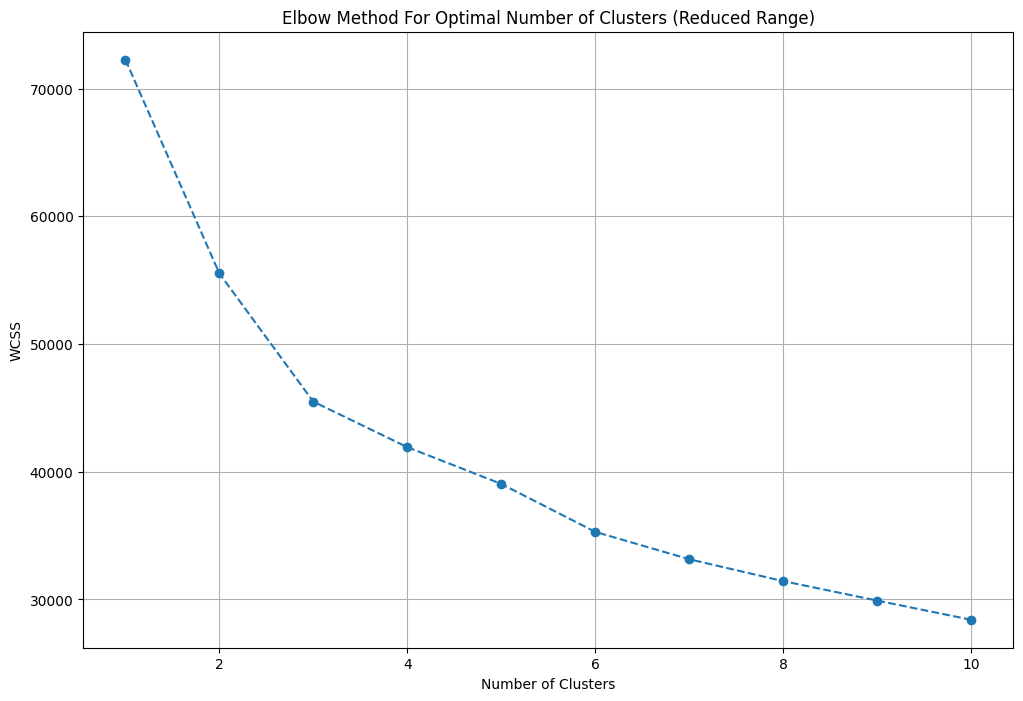

In [49]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [50]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(scalled_df)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scalled_df)

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [53]:
data = data.iloc[:,:-18]

In [54]:
data['furnishing_type'] = cluster_assignments

In [56]:
data.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
744,"['2 Wardrobe', '4 Fan', '1 Exhaust Fan', '5 Li...",0
3763,[],0
1092,"['1 Light', '1 AC', 'No Bed', 'No Chimney', 'N...",0
2006,"['1 Bed', '3 Wardrobe', '1 Sofa', '1 Exhaust F...",2
3760,[],0


#### Features

In [57]:
data[['society','features']].sample(5)

,society,features
1451,signature global city 92,"['Security / Fire Alarm', 'Lift(s)', 'Maintena..."
2436,kendriya vihar,"['Water purifier', 'Security / Fire Alarm', 'F..."
538,emaar imperial gardens,"['Security / Fire Alarm', 'Power Back-up', 'Fe..."
166,godrej icon,"['Security / Fire Alarm', 'Lift(s)', 'Maintena..."
110,the crew bos chs manesar,"['Power Back-up', 'Intercom Facility', 'Lift(s..."


In [58]:
data['features'].isnull().sum() # 0

635

In [59]:
app_data= pd.read_csv('appartments.csv')
app_data.head()

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Pa...","{'Bajghera Road': '800 Meter', 'Palam Vihar Ha...",https://www.99acres.com/smartworld-one-dxp-sec...,"{'2 BHK': {'building_type': 'Apartment', 'area...","['Swimming Pool', 'Salon', 'Restaurant', 'Spa'..."
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap Un...","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The N...",https://www.99acres.com/m3m-crown-sector-111-g...,"{'3 BHK': {'building_type': 'Apartment', 'area...","['Bowling Alley', 'Mini Theatre', 'Manicured G..."
2,Adani Brahma Samsara Vilasa,"Land, 3, 4 BHK Independent Floor in Sector 63,...","['AIPL Business Club Sector 62', 'Heritage Xpe...","{'AIPL Business Club Sector 62': '2.7 Km', 'He...",https://www.99acres.com/adani-brahma-samsara-v...,{'3 BHK': {'building_type': 'Independent Floor...,"['Terrace Garden', 'Gazebo', 'Fountain', 'Amph..."
3,Sobha City,"2, 3, 4 BHK Apartment in Sector 108, Gurgaon","['The Shikshiyan School', 'WTC Plaza', 'Luxus ...","{'The Shikshiyan School': '2.9 KM', 'WTC Plaza...",https://www.99acres.com/sobha-city-sector-108-...,"{'2 BHK': {'building_type': 'Apartment', 'area...","['Swimming Pool', 'Volley Ball Court', 'Aerobi..."
4,Signature Global City 93,"2, 3 BHK Independent Floor in Sector 93 Gurgaon","['Pranavananda Int. School', 'DLF Site central...","{'Pranavananda Int. School': '450 m', 'DLF Sit...",https://www.99acres.com/signature-global-city-...,{'2 BHK': {'building_type': 'Independent Floor...,"['Mini Theatre', 'Doctor on Call', 'Concierge ..."


In [60]:
app_data['PropertyName'] = app_data['PropertyName'].str.lower()

In [61]:
temp_df = data[data['features'].isnull()]

In [62]:
temp_df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'additionalRoom',
       'floorNum', 'facing', 'agePossession', 'nearbyLocations',
       'furnishDetails', 'features', 'super_built_up_area', 'built_up_area',
       'carpet_area', 'study room', 'servant room', 'store room', 'pooja room',
       'others', '', 'furnishing_type'],
      dtype='object')

In [76]:
temp_df = temp_df.drop(columns=[''], errors='ignore')

In [77]:
temp_df.shape

(635, 26)

In [78]:
x = temp_df.merge(app_data,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [79]:
data.loc[temp_df.index,'features'] = x.values

In [80]:
data['features'].isnull().sum()

481

In [81]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [82]:
# Convert the string representation of lists in the 'features' column to actual lists
data['features_list'] = data['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(data['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [83]:
features_binary_df.sample(4)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,...,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
3347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
544,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,1,0,0
3781,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1272,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
features_binary_df.shape

(3803, 130)

In [85]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\

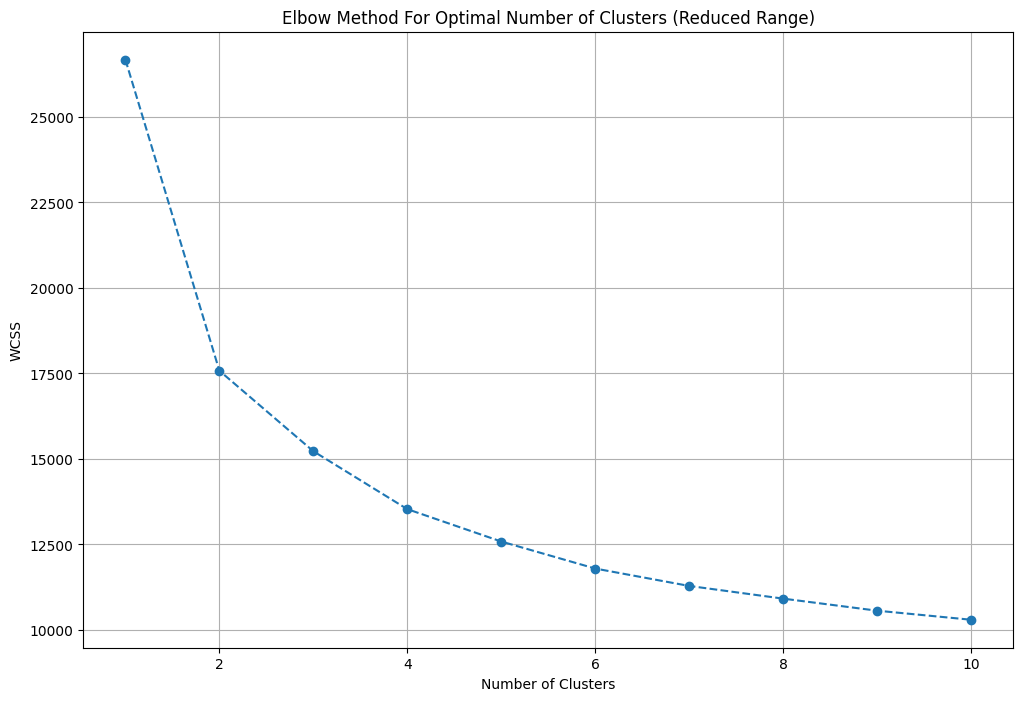

In [86]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [87]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [89]:
data['luxury_score'] = luxury_score

In [90]:
data.head(2)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,...,NaN,650.0,0,0,0,0,0,0,"[Lift(s), Park]",8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,...,NaN,1103.0,1,1,0,0,0,0,"[Power Back-up, Intercom Facility, Lift(s), Sw...",38


In [92]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
data.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [93]:
data.sample(3)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2354,flat,tulip violet,sector 69,1.50,10714.0,1400.0,Super Built up area 1578(146.6 sq.m.)Carpet ar...,3,3,2,...,1578.0,NaN,1400.0,0,0,0,1,0,2,174
1799,flat,godrej air,sector 85,1.83,10005.0,1829.0,Carpet area: 1829 (169.92 sq.m.),3,3,3+,...,NaN,NaN,1829.0,0,0,0,0,0,0,110
819,flat,ramprastha the edge towers,sector 37d,1.10,5528.0,1990.0,Built Up area: 1990 (184.88 sq.m.),3,3,3,...,NaN,1990.0,NaN,0,0,0,0,0,0,63


In [94]:
data.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)